<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the upcoming book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler (expected Aug 2017).
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*

<!--NAVIGATION-->
< [None](08.04-Implementing-Agglomerative-Hierarchical-Clustering.ipynb) | [Contents](../README.md) | [None](10.00-Combining-Different-Algorithms-Into-an-Ensemble.ipynb) >

In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    def __init__(self, lr=0.01, n_iter=10):
        self.lr = lr
        self.n_iter = n_iter

In [3]:
p = Perceptron()

In [4]:
p.lr

0.01

In [5]:
p.n_iter

10

In [6]:
class Perceptron(object):
    def __init__(self, lr=0.01, n_iter=10):
        self.lr = lr
        self.n_iter = n_iter
        
    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0.0, 1, -1)
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0
        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                delta = self.lr * (yi - self.predict(xi))
                self.weights += delta * xi
                self.bias += delta

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2.2, random_state=42)

In [8]:
y = 2 * y - 1

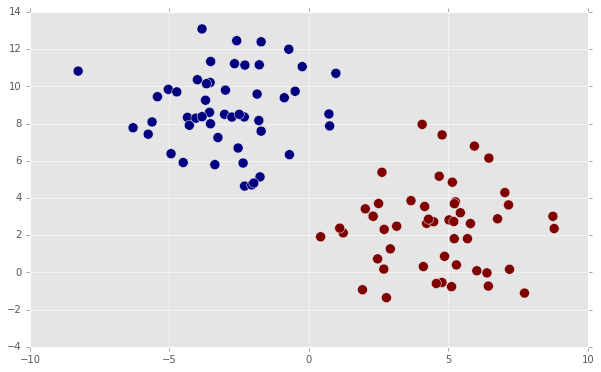

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y);

In [10]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)

In [11]:
p.weights

array([ 2.20091094, -0.4798926 ])

In [12]:
p.bias

0.20000000000000001

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(p.predict(X), y)

1.0

In [14]:
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

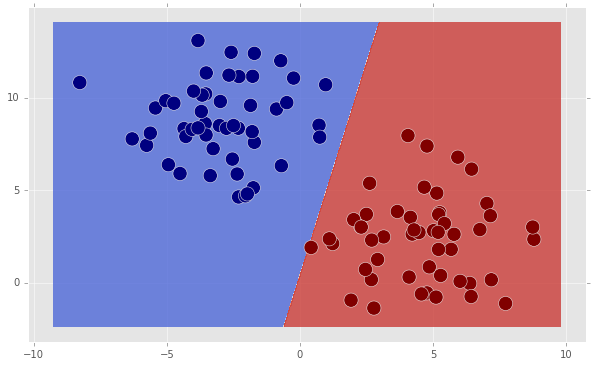

In [15]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)

<!--NAVIGATION-->
< [None](08.04-Implementing-Agglomerative-Hierarchical-Clustering.ipynb) | [Contents](../README.md) | [None](10.00-Combining-Different-Algorithms-Into-an-Ensemble.ipynb) >